In [119]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# library to get the inference of the ML algorithm performance
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay

import warnings
warnings.simplefilter(action='ignore')


## Importing the dataset

In [120]:
white_wine=pd.read_csv("winequality-white.csv")
wine=pd.read_csv("winequality-white.csv")

#### Viewing 5 elments of the dataset for understanding  

In [121]:
print(white_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [122]:
white_wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         4898 non-null   float64
 1   volatile acidity      4898 non-null   float64
 2   citric acid           4898 non-null   float64
 3   residual sugar        4898 non-null   float64
 4   chlorides             4898 non-null   float64
 5   free sulfur dioxide   4898 non-null   float64
 6   total sulfur dioxide  4898 non-null   float64
 7   density               4898 non-null   float64
 8   pH                    4898 non-null   float64
 9   sulphates             4898 non-null   float64
 10  alcohol               4898 non-null   float64
 11  quality               4898 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


In [123]:
white_wine.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


### Checking the different labels present for the wine

In [124]:
white_wine['quality'].value_counts()

quality
6    2198
5    1457
7     880
8     175
4     163
3      20
9       5
Name: count, dtype: int64

## Binning of labels into "good" or "bad"

In [125]:
bins = (2, 6.5, 8)
white_wine['quality'] = pd.cut(x = white_wine['quality'], bins = bins, labels = ['bad','good'])

In [126]:
white_wine['quality']

0        bad
1        bad
2        bad
3        bad
4        bad
        ... 
4893     bad
4894     bad
4895     bad
4896    good
4897     bad
Name: quality, Length: 4898, dtype: category
Categories (2, object): ['bad' < 'good']

### Trying to visualise the features of the dataset using histograms

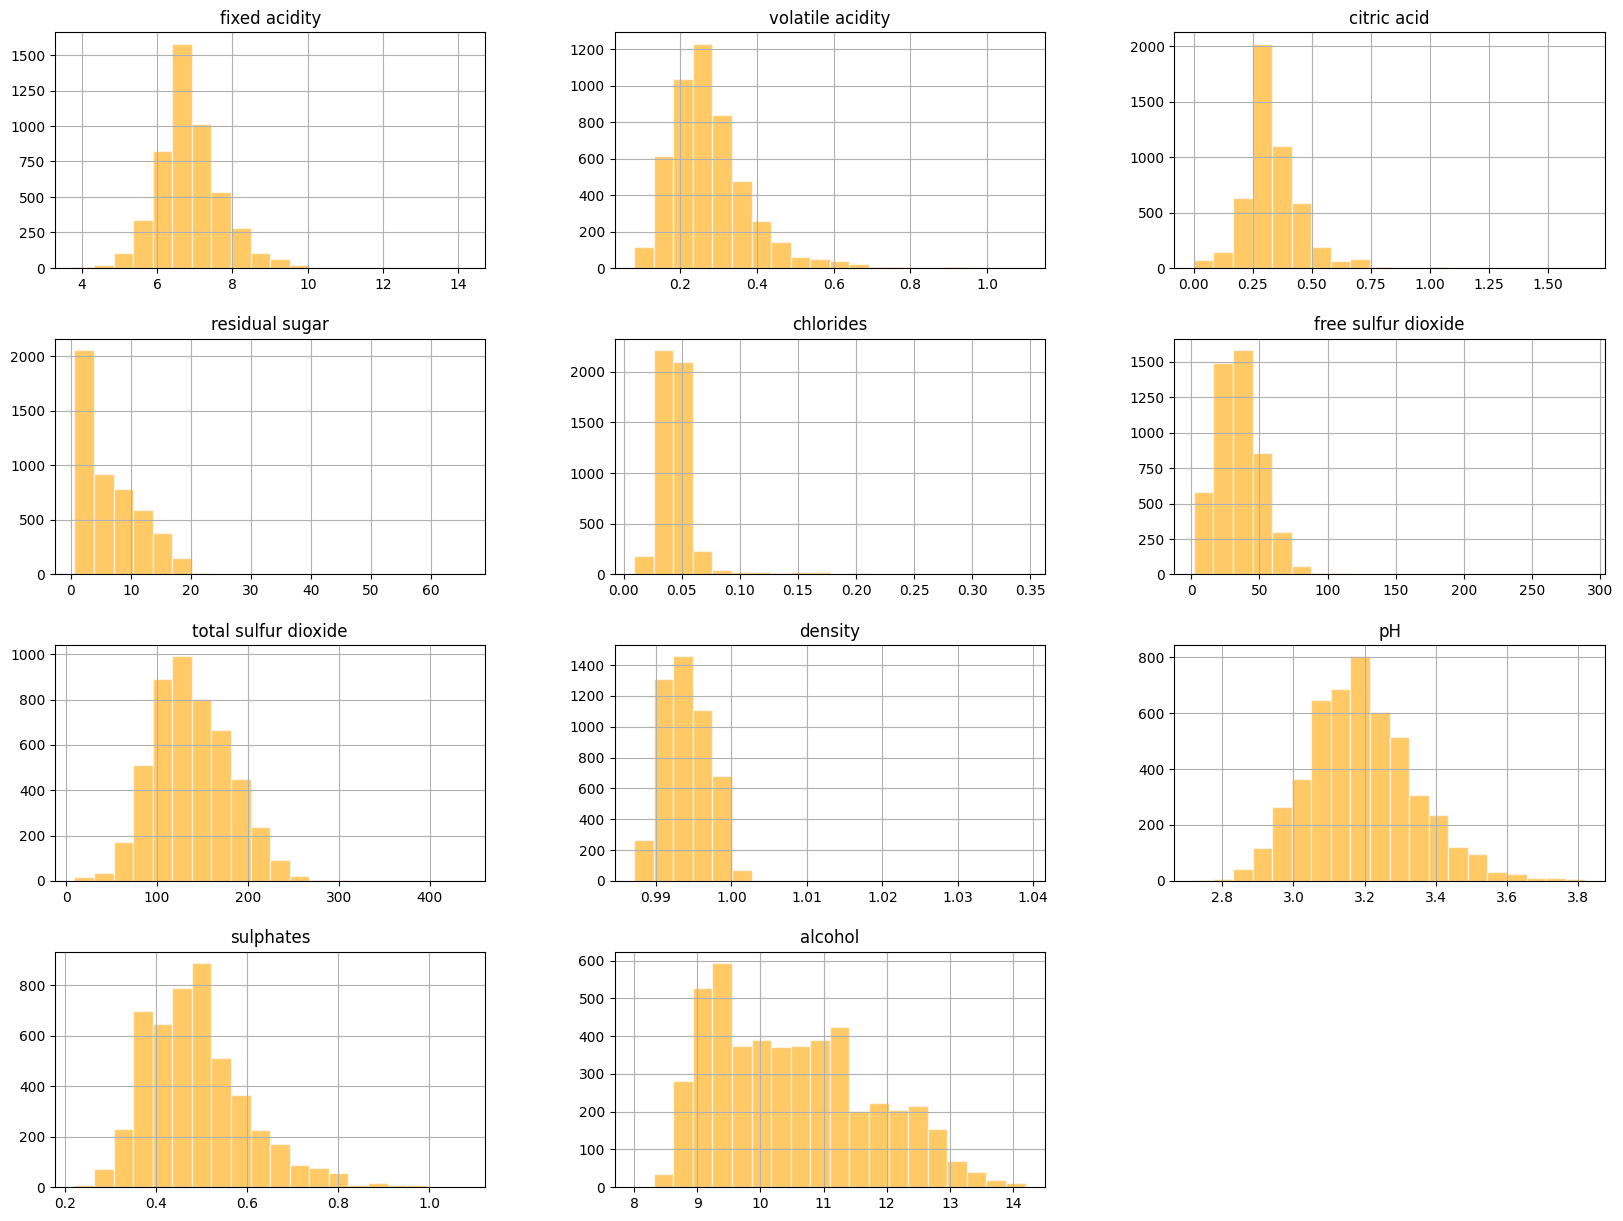

In [127]:
white_wine.hist(figsize=(20,15),ec='white',bins=20,color='orange',alpha=0.6)
plt.show()

## Writing a function to evaluate any 2 attributes using quality category

In [128]:

def attribute_plot(att1,att2):
    """
    Create a 3x3 grid of KDE and Box plots and Violinplots for two attributes separated by the 'quality' category.

    Parameters:
    - att1: The first attribute for analysis
    - att2: The second attribute for analysis

    Returns:
    - None (plots are displayed)
    """
    
    plt.figure(figsize=(14,9))
    
    plt.subplot(3,3,1)
    sns.kdeplot(white_wine.loc[white_wine["quality"]=='bad'][att1],fill=True,color='red')
    sns.kdeplot(white_wine.loc[white_wine["quality"]=='good'][att1],fill=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att1.upper(),fontsize=15)
    
    plt.subplot(3,3,2)
    sns.kdeplot(white_wine.loc[white_wine["quality"]=='bad'][att2],fill=True,color='red')
    sns.kdeplot(white_wine.loc[white_wine["quality"]=='good'][att2],fill=True,color='blue')
    plt.legend(["bad","good"])
    plt.title(att2.upper(),fontsize=15)
    
    plt.subplot(3,3,3)
    sns.boxplot(data=white_wine,y=att1,x="quality",palette='viridis')
    
    plt.subplot(3,3,4)
    
    sns.boxplot(data=white_wine,y=att2,x="quality",palette='viridis')
    
    plt.subplot(3,3,5)
    sns.violinplot(data=white_wine,y=att1,x="quality",palette='viridis')
    plt.subplot(3,3,6)
    sns.violinplot(data=white_wine,y=att2,x="quality",palette='viridis')
    
    plt.show()

### Relations between fixed aidity and volatile acidity

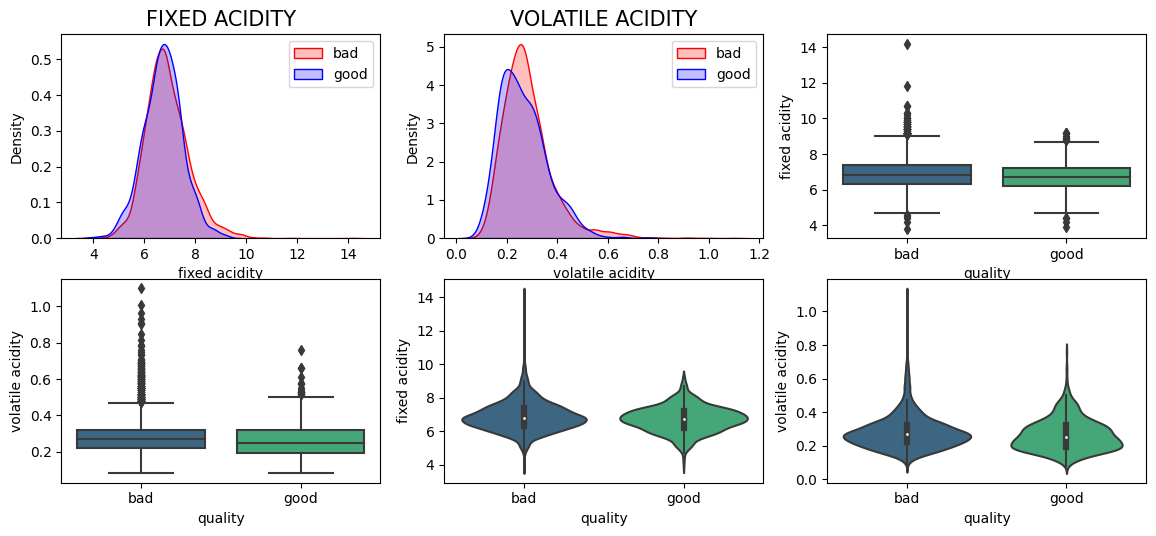

In [129]:
attribute_plot("fixed acidity","volatile acidity")

### Relation between citric acid and alcohol 

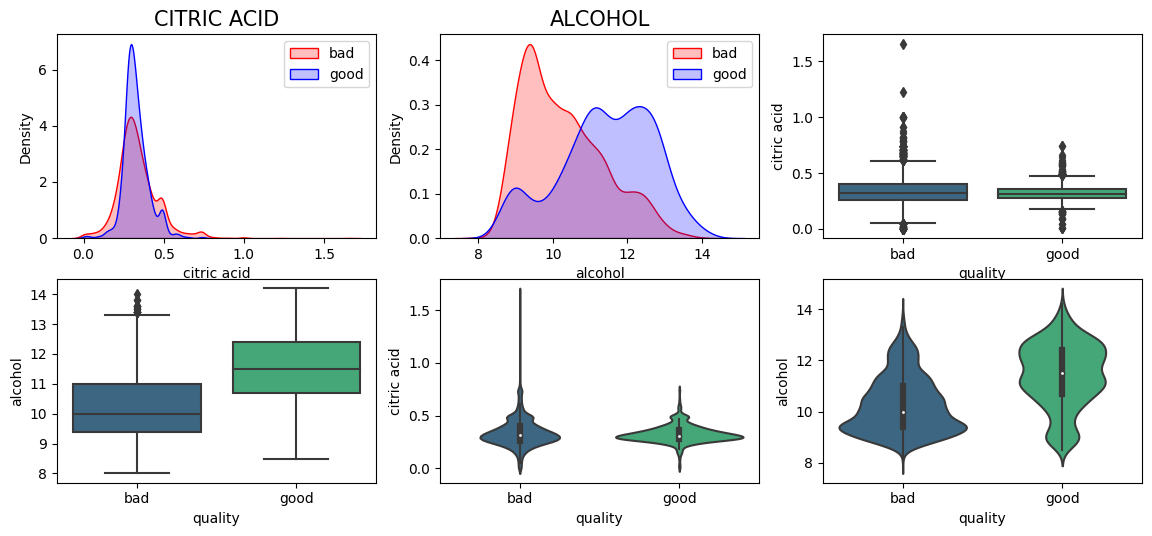

In [130]:
attribute_plot("citric acid","alcohol")

### Relation between chlorides and density

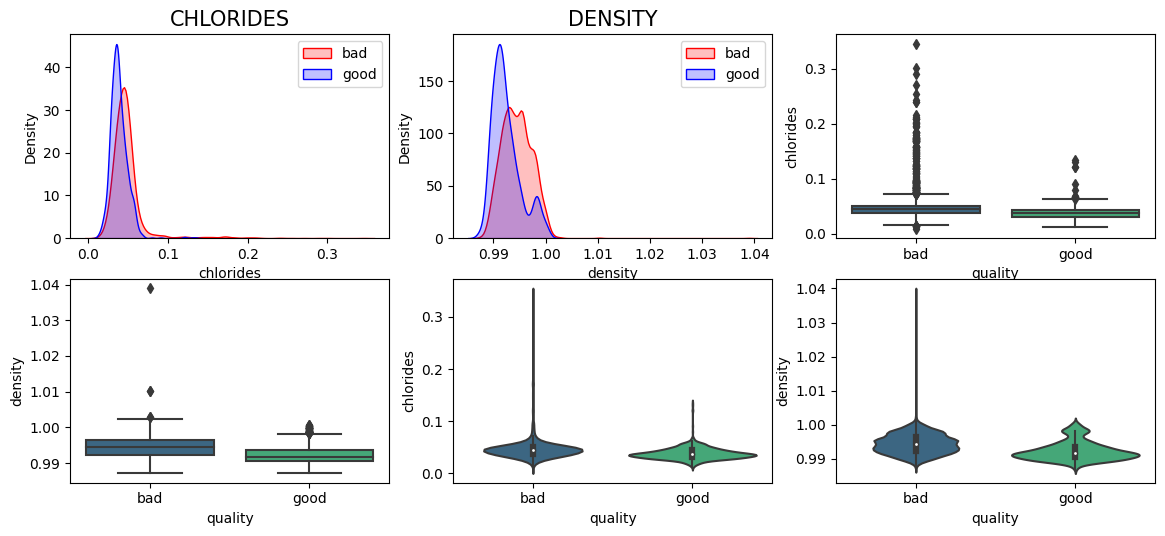

In [131]:
attribute_plot("chlorides","density")

### Relation between total sulfur dioxide and free sulphur dioxide 

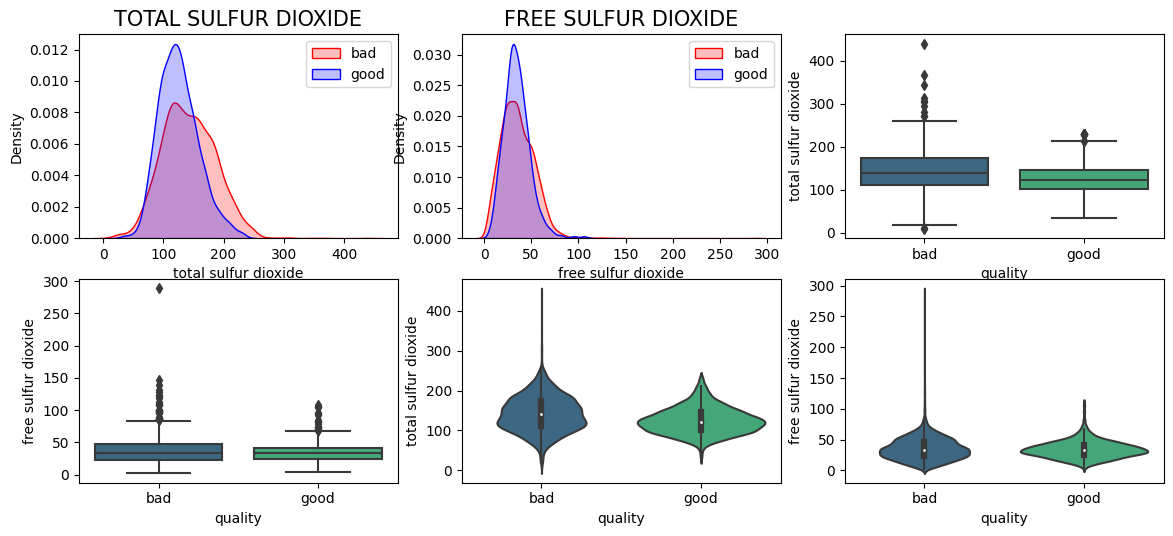

In [132]:
attribute_plot("total sulfur dioxide","free sulfur dioxide")

### Relation between pH and sulphates

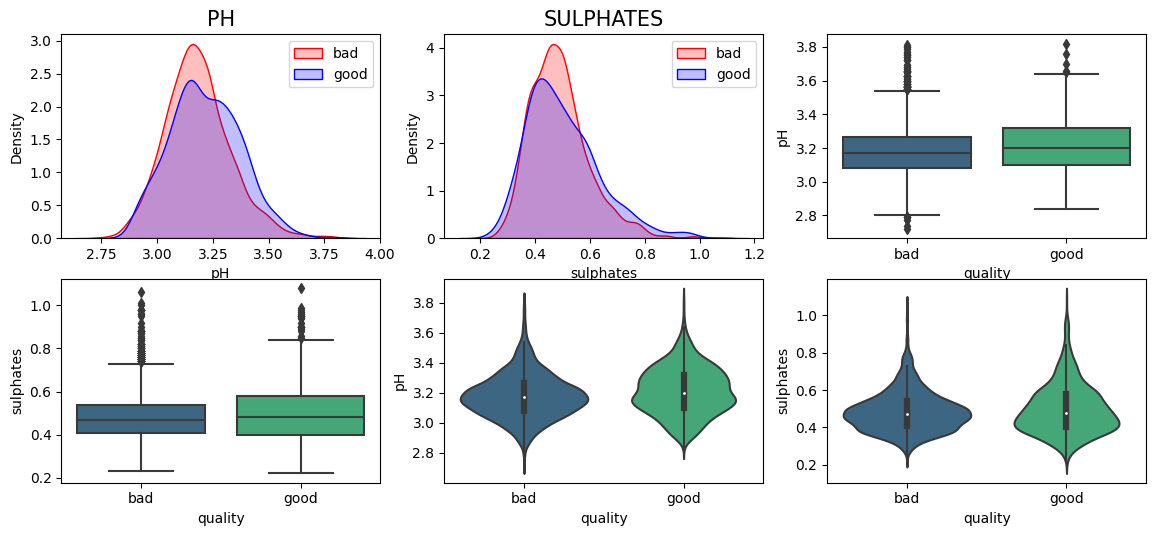

In [133]:
attribute_plot("pH","sulphates")

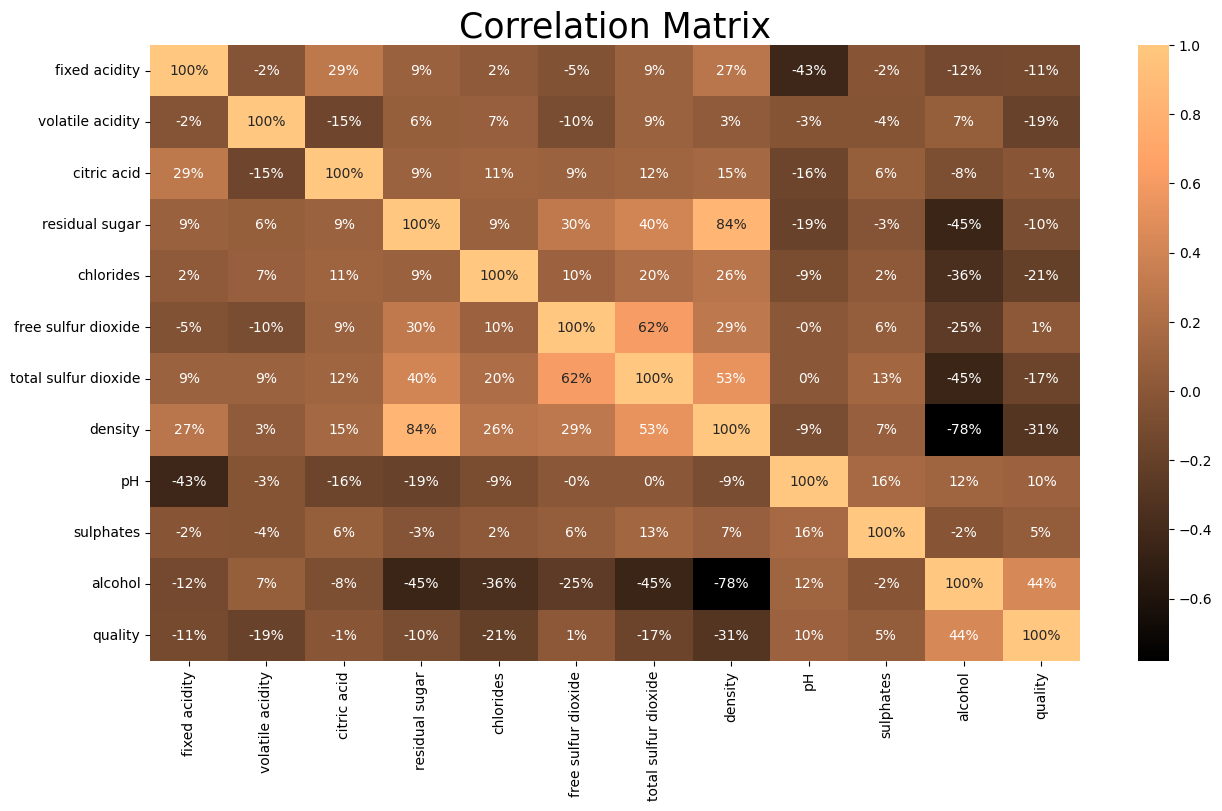

In [134]:
plt.figure(figsize=(15,8))
sns.heatmap(wine.corr(),annot=True,fmt=".0%",cmap='copper')
plt.title('Correlation Matrix',size=25)
plt.show()

# DATA PREPROCESSING 

### Checking for any NULL values 

In [135]:
white_wine.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 5
dtype: int64

Since , no value is missin we do not have to impute the values ourselves


In [136]:
white_wine['quality'].value_counts()

quality
bad     3838
good    1055
Name: count, dtype: int64

### Encoding "good" ,"bad" using label encoder

In [137]:
from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
white_wine['quality']=label_encoder.fit_transform(white_wine['quality'])

In [138]:
white_wine['quality'].value_counts()

quality
0    3838
1    1055
2       5
Name: count, dtype: int64

In [139]:
white_wine = white_wine.drop(white_wine[white_wine['quality'] == 2].index)

### Seperating features and their labels

In [140]:
X=white_wine.iloc[:,:-1].values
Y=white_wine.iloc[:,-1].values

In [141]:
X,Y

(array([[ 7.  ,  0.27,  0.36, ...,  3.  ,  0.45,  8.8 ],
        [ 6.3 ,  0.3 ,  0.34, ...,  3.3 ,  0.49,  9.5 ],
        [ 8.1 ,  0.28,  0.4 , ...,  3.26,  0.44, 10.1 ],
        ...,
        [ 6.5 ,  0.24,  0.19, ...,  2.99,  0.46,  9.4 ],
        [ 5.5 ,  0.29,  0.3 , ...,  3.34,  0.38, 12.8 ],
        [ 6.  ,  0.21,  0.38, ...,  3.26,  0.32, 11.8 ]]),
 array([0, 0, 0, ..., 0, 1, 0]))

## Splitting into test and training data

In [142]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(X,Y,test_size=0.2,random_state=1)

xtrain,xtest,ytrain,ytest

(array([[ 6.9 ,  0.19,  0.35, ...,  3.21,  0.54, 10.8 ],
        [ 8.3 ,  0.3 ,  0.36, ...,  3.23,  0.51,  9.3 ],
        [ 6.6 ,  0.19,  0.41, ...,  3.14,  0.57,  9.8 ],
        ...,
        [ 7.5 ,  0.24,  0.31, ...,  3.08,  0.53,  8.8 ],
        [ 6.8 ,  0.11,  0.27, ...,  3.2 ,  0.37,  9.9 ],
        [ 7.2 ,  0.23,  0.38, ...,  3.09,  0.44,  9.  ]]),
 array([[ 6.1 ,  0.38,  0.42, ...,  3.15,  0.31, 12.4 ],
        [ 7.5 ,  0.23,  0.36, ...,  3.04,  0.32, 11.  ],
        [ 6.8 ,  0.21,  0.27, ...,  3.3 ,  0.36,  8.7 ],
        ...,
        [ 8.2 ,  0.18,  0.38, ...,  2.88,  0.6 , 12.  ],
        [ 7.2 ,  0.34,  0.3 , ...,  3.48,  0.62,  9.7 ],
        [ 6.1 ,  0.24,  0.27, ...,  3.31,  0.47,  9.5 ]]),
 array([1, 0, 0, ..., 0, 0, 0]),
 array([1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0,

In [143]:
print("Shape of X_train: ",xtrain.shape)
print("Shape of X_test: ", xtest.shape)
print("Shape of y_train: ",ytrain.shape)
print("Shape of y_test",ytest.shape)

Shape of X_train:  (3914, 11)
Shape of X_test:  (979, 11)
Shape of y_train:  (3914,)
Shape of y_test (979,)


## Feature scaling of the data

In [144]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [145]:
xtrain,xtest

(array([[ 0.05860691, -0.88023304,  0.14038422, ...,  0.13471338,
          0.4439738 ,  0.23903394],
        [ 1.7212651 ,  0.2089023 ,  0.22445151, ...,  0.26691048,
          0.17911883, -0.98486574],
        [-0.29767699, -0.88023304,  0.64478798, ..., -0.3279765 ,
          0.70882877, -0.57689918],
        ...,
        [ 0.7711747 , -0.38517152, -0.19588496, ..., -0.72456782,
          0.35568881, -1.3928323 ],
        [-0.06015439, -1.67233148, -0.53215413, ...,  0.06861482,
         -1.05687103, -0.49530587],
        [ 0.41489081, -0.48418383,  0.3925861 , ..., -0.65846926,
         -0.4388761 , -1.22964568]]),
 array([[-0.89148348,  1.00100073,  0.72885528, ..., -0.26187794,
         -1.58658097,  1.54452693],
        [ 0.7711747 , -0.48418383,  0.22445151, ..., -0.98896203,
         -1.49829598,  0.40222056],
        [-0.06015439, -0.68220844, -0.53215413, ...,  0.72960036,
         -1.14515602, -1.47442561],
        ...,
        [ 1.6025038 , -0.97924535,  0.3925861 , ..., -

# Applying ML classification algorithms 

### Logistic Regression

In [146]:
from sklearn.linear_model import LogisticRegression
logistic_regressor = LogisticRegression()
logistic_regressor.fit(xtrain, ytrain)
y_pred1 = logistic_regressor.predict(xtest)


In [147]:
score1 = accuracy_score(ytest, y_pred1)
print('Accuracy Score = ' + str(score*100))

Accuracy Score = 78.87755102040816


In [148]:
cf_matrix1=confusion_matrix(ytest,y_pred1)

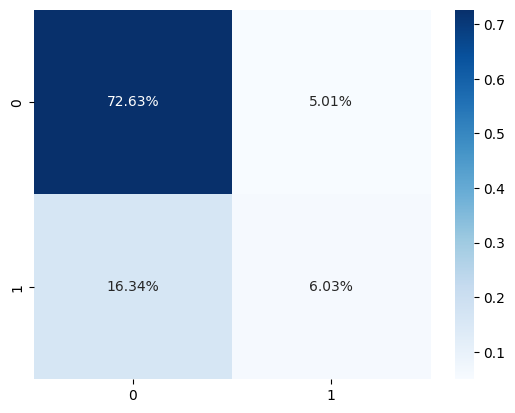

In [149]:
sns.heatmap(cf_matrix1/np.sum(cf_matrix1), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

### Decision Tree Classifier

In [150]:
from sklearn.tree import DecisionTreeClassifier
decision_classifier=DecisionTreeClassifier()
decision_classifier.fit(xtrain,ytrain)
y_pred2=decision_classifier.predict(xtest)

In [151]:
score2 = accuracy_score(ytest, y_pred2)
print('Accuracy Score = ' + str(score2*100))

Accuracy Score = 83.75893769152196


In [152]:
cf_matrix2=confusion_matrix(ytest,y_pred2)

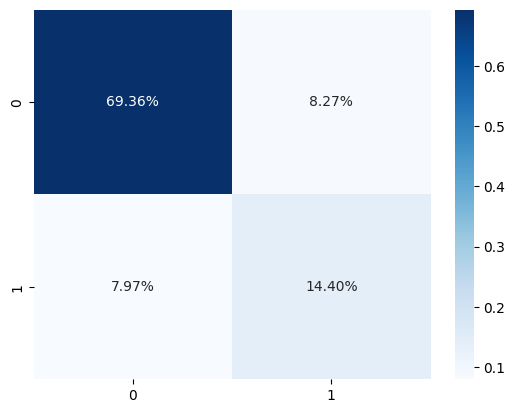

In [153]:
sns.heatmap(cf_matrix2/np.sum(cf_matrix2), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

### Naive Bayes Classifier

In [154]:
from sklearn.naive_bayes import GaussianNB
nb_classifier=GaussianNB()
nb_classifier.fit(xtrain,ytrain)
y_pred3=nb_classifier.predict(xtest)

In [155]:
score3 = accuracy_score(ytest, y_pred3)
print('Accuracy Score = ' + str(score3*100))

Accuracy Score = 70.78651685393258


In [156]:
cf_matrix3=confusion_matrix(ytest,y_pred3)

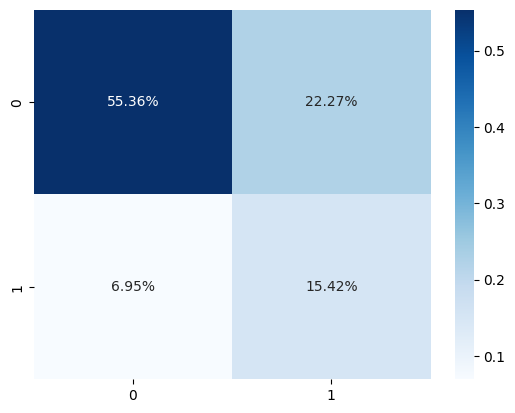

In [157]:
sns.heatmap(cf_matrix3/np.sum(cf_matrix3), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

### Random Forest Classifier

In [158]:
from sklearn.ensemble import RandomForestClassifier
random_forest_classifier=RandomForestClassifier()
random_forest_classifier.fit(xtrain,ytrain)
y_pred4=random_forest_classifier.predict(xtest)

In [159]:
score4 = accuracy_score(ytest, y_pred4)
print('Accuracy Score = ' + str(score4*100))

Accuracy Score = 87.64044943820225


In [160]:
cf_matrix4=confusion_matrix(ytest,y_pred4)

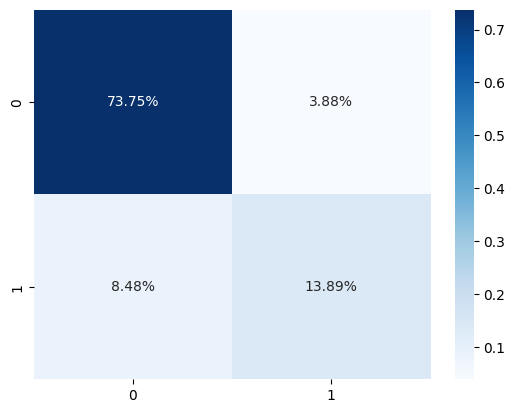

In [161]:
sns.heatmap(cf_matrix4/np.sum(cf_matrix4), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

### Support Vector Machine

In [162]:
from sklearn.svm import SVC
svc=SVC()
svc.fit(xtrain,ytrain)
y_pred5=svc.predict(xtest)

In [163]:
score5 = accuracy_score(ytest, y_pred5)
print('Accuracy Score = ' + str(score5*100))

Accuracy Score = 81.61389172625128


In [164]:
cf_matrix5=confusion_matrix(ytest,y_pred5)

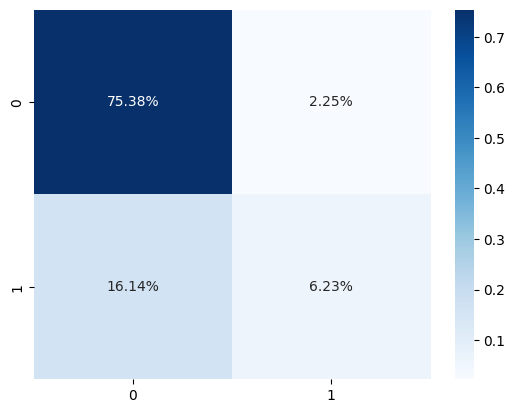

In [165]:
sns.heatmap(cf_matrix5/np.sum(cf_matrix5), annot=True, 
            fmt='.2%', cmap='Blues')
plt.show()

## Writing a function to compare the models using cross validation score

In [166]:
from sklearn.model_selection import cross_val_score
def CrossValidationScore(model_list,x,y):
    
    mean = []
    modelname = []
    
    for model in model_list:
        modelname.append(type(model).__name__)
        
    for i in model_list:
        scores = cross_val_score(i, x, y, cv=5)
        mean.append(scores.mean())
        
    cvs = pd.DataFrame({"Model Name":modelname,"CVS":mean})
    return cvs.style.background_gradient("Greens")

In [167]:
model_list=[logistic_regressor,decision_classifier,nb_classifier,random_forest_classifier,svc]

In [168]:
CrossValidationScore(model_list,X,Y)

,Model Name,CVS
0,LogisticRegression,0.792761
1,DecisionTreeClassifier,0.746766
2,GaussianNB,0.726518
3,RandomForestClassifier,0.804201
4,SVC,0.784386
